In [28]:
import pandas as pd

# Define full raw data path
path = r"C:\Users\user\Jupyter Notebook\fashion project\data\raw\\"

# Load only 100000 rows from each CSV
customers = pd.read_csv(path + "customers.csv", nrows=100000, low_memory=False)
discounts = pd.read_csv(path + "discounts.csv", nrows=100000, low_memory=False)
employees = pd.read_csv(path + "employees.csv", nrows=100000, low_memory=False)
products = pd.read_csv(path + "products.csv", nrows=100000, low_memory=False)
stores = pd.read_csv(path + "stores.csv", nrows=100000, low_memory=False)
transactions = pd.read_csv(path + "transactions.csv", nrows=100000, low_memory=False)

print("✅ All datasets loaded successfully from your data/raw folder!")


✅ All datasets loaded successfully from your data/raw folder!


In [29]:
#customer.csv
customers.columns = customers.columns.str.lower().str.replace(' ', '_')
# 'Customer ID' -> 'customer_id', 'Date Of Birth' -> 'date_of_birth'

# Check
print(customers.info())
print(customers.isnull().sum())

# Drop duplicates
customers = customers.drop_duplicates()

# Drop rows where Customer ID is missing
customers = customers.drop_duplicates()
customers = customers.dropna(subset=['customer_id'])


# Example: clean age column
if 'age' in customers.columns:
    customers['age'] = customers['age'].fillna(customers['age'].median())

customers['name'] = customers['name'].str.strip().str.title()
customers['email'] = customers['email'].str.strip().str.lower()
customers['gender'] = customers['gender'].str.upper()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   customer_id    100000 non-null  int64 
 1   name           100000 non-null  object
 2   email          100000 non-null  object
 3   telephone      100000 non-null  object
 4   city           100000 non-null  object
 5   country        100000 non-null  object
 6   gender         100000 non-null  object
 7   date_of_birth  100000 non-null  object
 8   job_title      54800 non-null   object
dtypes: int64(1), object(8)
memory usage: 6.9+ MB
None
customer_id          0
name                 0
email                0
telephone            0
city                 0
country              0
gender               0
date_of_birth        0
job_title        45200
dtype: int64


In [30]:
#discount.csv
print(discounts.info()) 
print(discounts.isnull().sum())
# Standardize column names first
discounts.columns = discounts.columns.str.lower().str.replace(' ', '_')
# Now 'Discont' becomes 'discont', 'Sub Category' -> 'sub_category'

# Drop duplicates & missing essential info
discounts = discounts.drop_duplicates()
discounts = discounts.dropna(subset=['category', 'sub_category'])

# Clean numeric column
if discounts['discont'].dtype == 'object':
    discounts['discont'] = discounts['discont'].str.replace('%', '').astype(float)

# Clean text columns
discounts['category'] = discounts['category'].str.strip().str.title()
discounts['sub_category'] = discounts['sub_category'].str.strip().str.title()
discounts['description'] = discounts['description'].str.strip()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Start         181 non-null    object 
 1   End           181 non-null    object 
 2   Discont       181 non-null    float64
 3   Description   181 non-null    object 
 4   Category      171 non-null    object 
 5   Sub Category  171 non-null    object 
dtypes: float64(1), object(5)
memory usage: 8.6+ KB
None
Start            0
End              0
Discont          0
Description      0
Category        10
Sub Category    10
dtype: int64


In [31]:
#employee.csv
employees.columns = employees.columns.str.lower().str.replace(' ', '_')
# 'Employee ID' -> 'employee_id', 'Store ID' -> 'store_id'

print(employees.info())
print(employees.isnull().sum())

employees = employees.drop_duplicates()
employees = employees.dropna(subset=['employee_id'])

employees['position'] = employees['position'].str.strip().str.title()
employees['name'] = employees['name'].str.strip().str.title()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   employee_id  404 non-null    int64 
 1   store_id     404 non-null    int64 
 2   name         404 non-null    object
 3   position     404 non-null    object
dtypes: int64(2), object(2)
memory usage: 12.8+ KB
None
employee_id    0
store_id       0
name           0
position       0
dtype: int64


In [32]:
#products.csv
products.columns = products.columns.str.lower().str.replace(' ', '_')
# 'Product ID' -> 'product_id', 'Sub Category' -> 'sub_category', 'Production Cost' -> 'production_cost'

print(products.info())
print(products.isnull().sum())

products = products.drop_duplicates()
products = products.dropna(subset=['product_id', 'category'])

# Standardize category names
products['category'] = products['category'].str.strip().str.title()
products['sub_category'] = products['sub_category'].str.strip().str.title()
products['production_cost'] = products['production_cost'].astype(float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17940 entries, 0 to 17939
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       17940 non-null  int64  
 1   category         17940 non-null  object 
 2   sub_category     17940 non-null  object 
 3   description_pt   17940 non-null  object 
 4   description_de   17940 non-null  object 
 5   description_fr   17940 non-null  object 
 6   description_es   17940 non-null  object 
 7   description_en   17940 non-null  object 
 8   description_zh   17940 non-null  object 
 9   color            5495 non-null   object 
 10  sizes            15870 non-null  object 
 11  production_cost  17940 non-null  float64
dtypes: float64(1), int64(1), object(10)
memory usage: 1.6+ MB
None
product_id             0
category               0
sub_category           0
description_pt         0
description_de         0
description_fr         0
description_es         0
desc

In [33]:
#stores.csv
stores.columns = stores.columns.str.lower().str.replace(' ', '_')
# 'Store ID' -> 'store_id', 'Number of Employees' -> 'number_of_employees'

stores = stores.drop_duplicates()
stores = stores.dropna(subset=['store_id', 'country'])

# Fix country names
stores['country'] = stores['country'].str.strip().str.title()

# Optional: clean city and store_name
stores['city'] = stores['city'].str.strip().str.title()
stores['store_name'] = stores['store_name'].str.strip().str.title()
stores['number_of_employees'] = stores['number_of_employees'].astype(int)
stores['latitude'] = stores['latitude'].astype(float)
stores['longitude'] = stores['longitude'].astype(float)
print(stores.info())
print(stores.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   store_id             35 non-null     int64  
 1   country              35 non-null     object 
 2   city                 35 non-null     object 
 3   store_name           35 non-null     object 
 4   number_of_employees  35 non-null     int64  
 5   zip_code             35 non-null     object 
 6   latitude             35 non-null     float64
 7   longitude            35 non-null     float64
dtypes: float64(2), int64(2), object(4)
memory usage: 2.3+ KB
None
store_id               0
country                0
city                   0
store_name             0
number_of_employees    0
zip_code               0
latitude               0
longitude              0
dtype: int64


In [34]:
#transaction.csv
transactions.columns = transactions.columns.str.lower().str.replace(' ', '_')
# Now Invoice ID -> invoice_id, Line Total -> line_total, Product ID -> product_id

# Drop duplicates
transactions = transactions.drop_duplicates()

# Drop rows with missing essential info
transactions = transactions.dropna(subset=['invoice_id', 'product_id', 'line_total'])

# Convert date column
transactions['date'] = pd.to_datetime(transactions['date'], errors='coerce')

# Drop rows with invalid dates
transactions = transactions.dropna(subset=['date'])

# Ensure numeric values for line_total
transactions['line_total'] = pd.to_numeric(transactions['line_total'], errors='coerce')
transactions = transactions.dropna(subset=['line_total'])

# Optional: rename line_total for clarity
transactions = transactions.rename(columns={'line_total': 'sales_amount'})

print(transactions.info())
print(transactions.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 99986 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   invoice_id        99986 non-null  object        
 1   line              99986 non-null  int64         
 2   customer_id       99986 non-null  int64         
 3   product_id        99986 non-null  int64         
 4   size              93645 non-null  object        
 5   color             33736 non-null  object        
 6   unit_price        99986 non-null  float64       
 7   quantity          99986 non-null  int64         
 8   date              99986 non-null  datetime64[ns]
 9   discount          99986 non-null  float64       
 10  sales_amount      99986 non-null  float64       
 11  store_id          99986 non-null  int64         
 12  employee_id       99986 non-null  int64         
 13  currency          99986 non-null  object        
 14  currency_symbol   99986 non

In [35]:
for name, df in [('Customers', customers), ('Discounts', discounts),
                 ('Employees', employees), ('Products', products),
                 ('Stores', stores), ('Transactions', transactions)]:
    print(f"{name}: {df.shape}")
    #print(f"\n{name}:")
    #print("-" * 50)
    #print("Shape:", df.shape)
    #print("Missing values:\n", df.isnull().sum())
    #print("First 3 rows:\n", df.head(3))

Customers: (100000, 9)
Discounts: (171, 6)
Employees: (404, 4)
Products: (17940, 12)
Stores: (35, 8)
Transactions: (99986, 19)


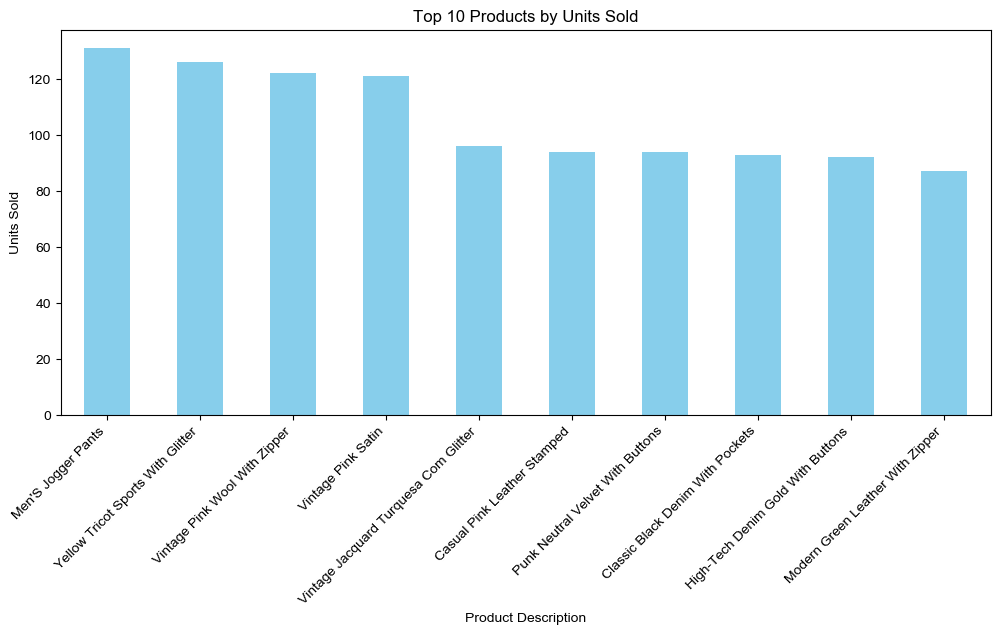

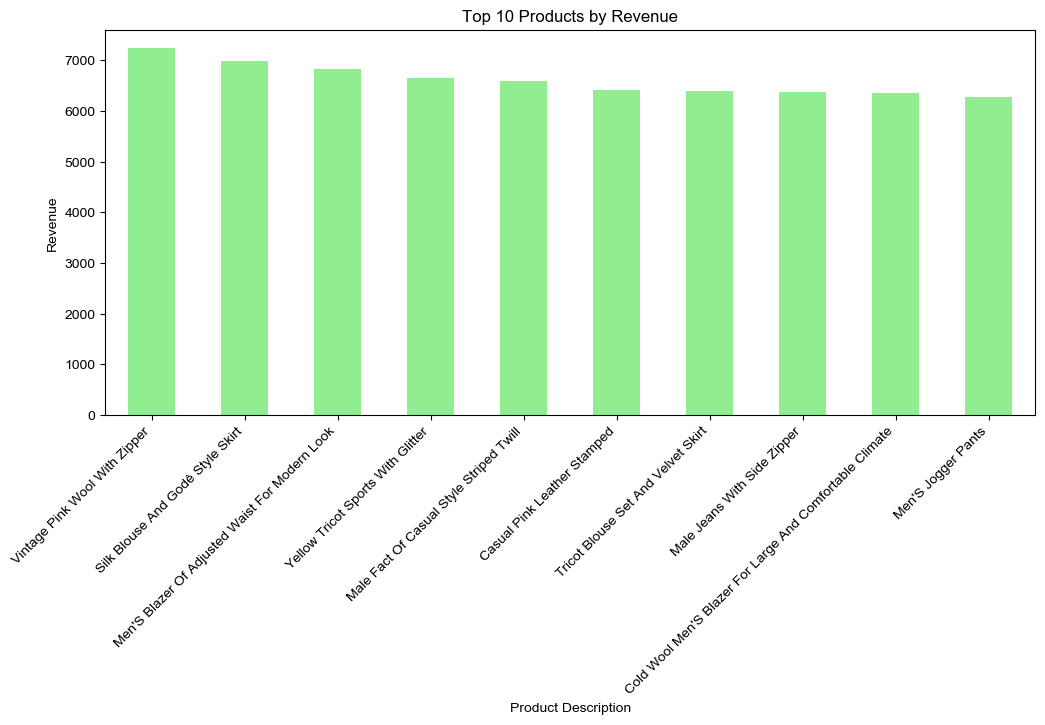

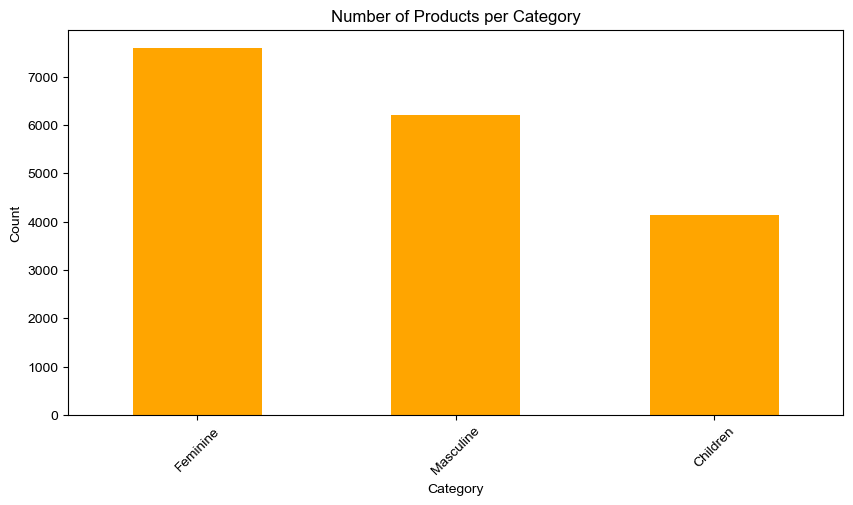

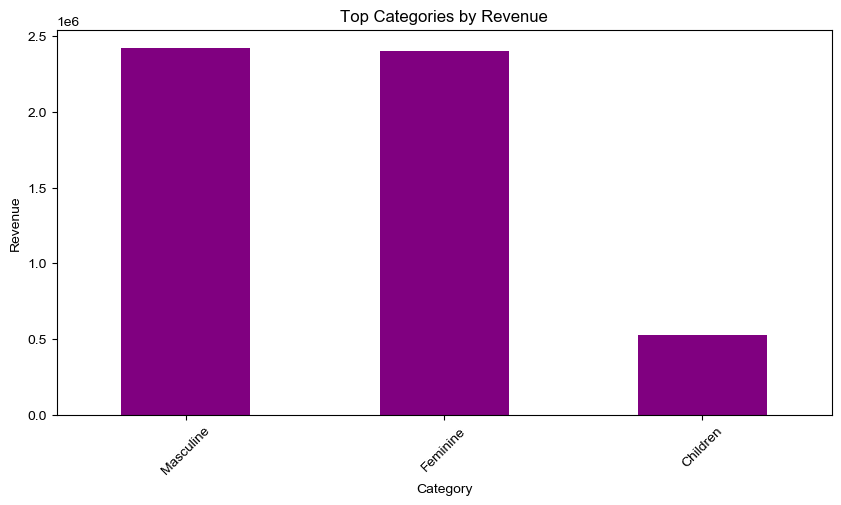

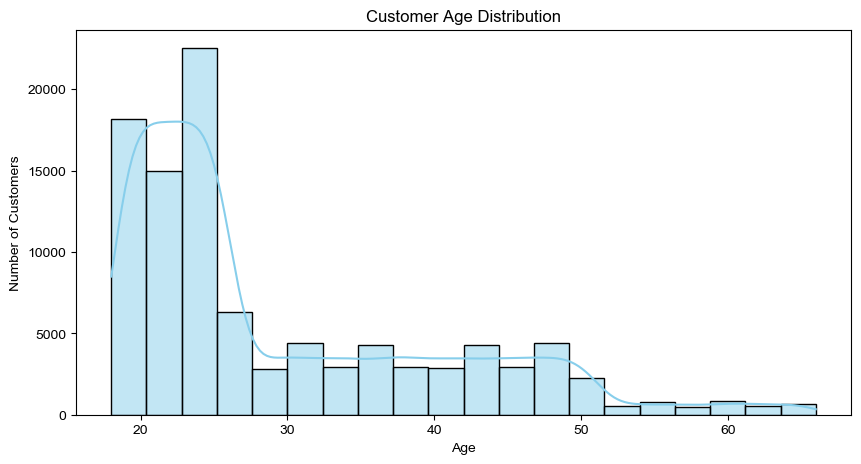

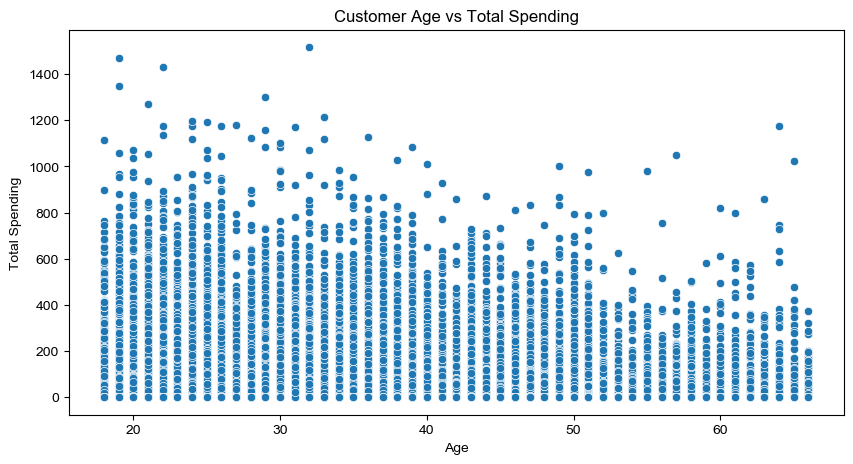

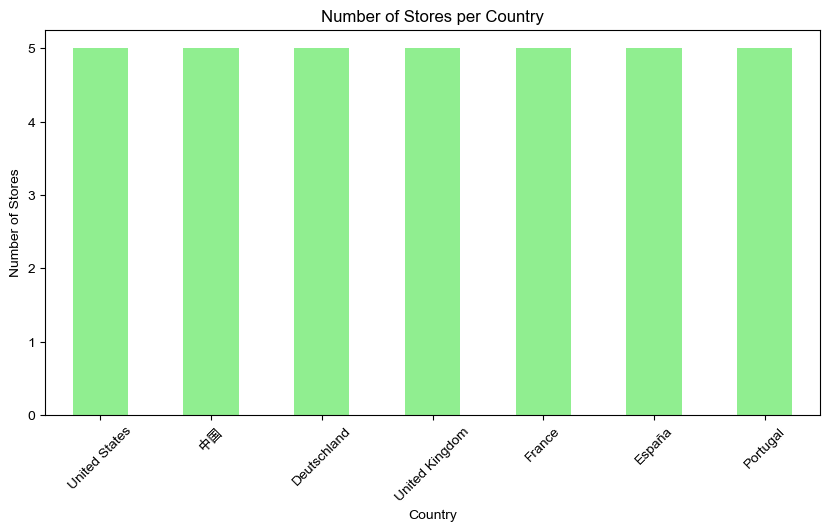

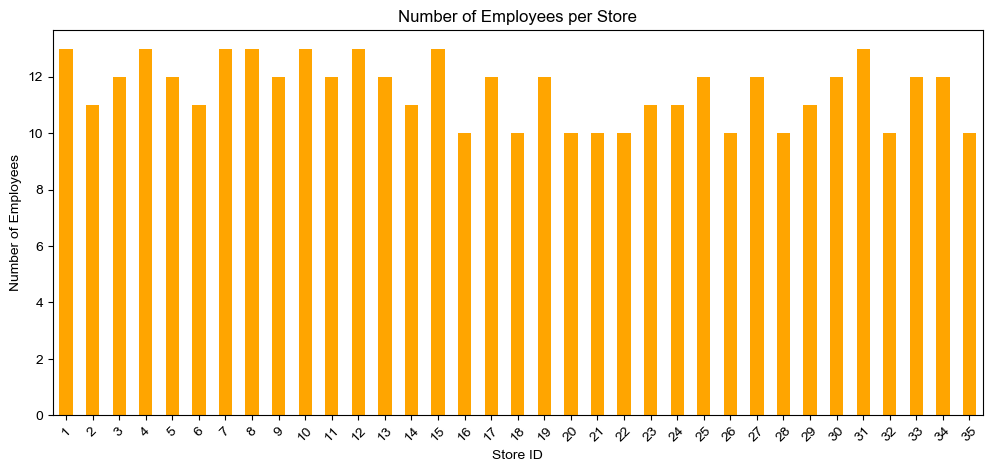

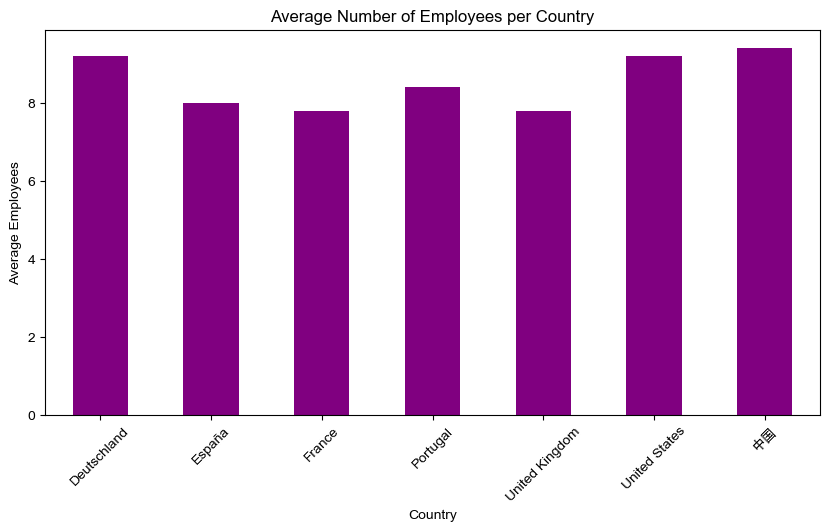

<Figure size 1200x500 with 0 Axes>

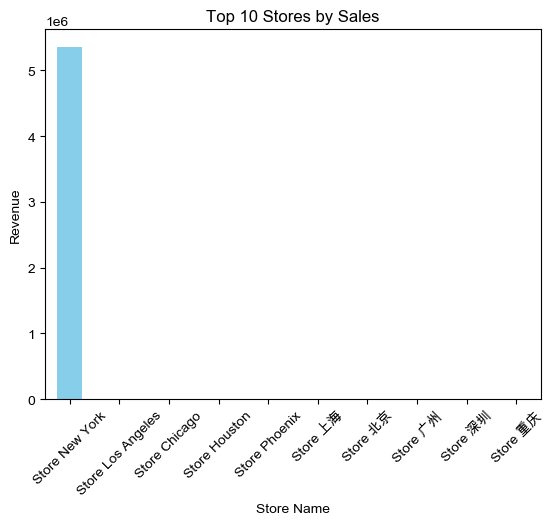

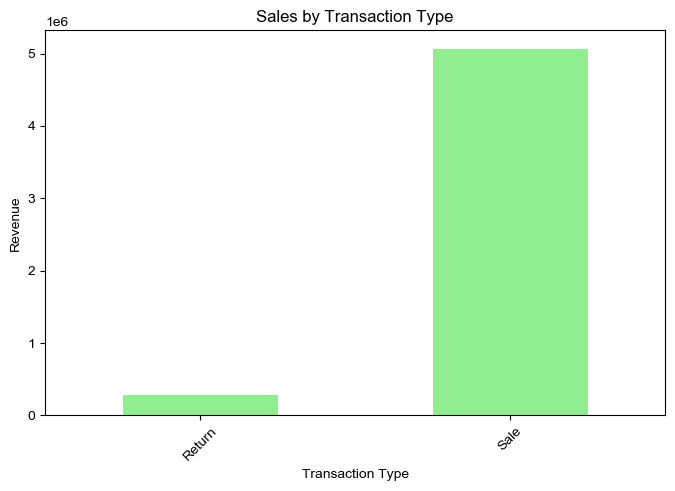

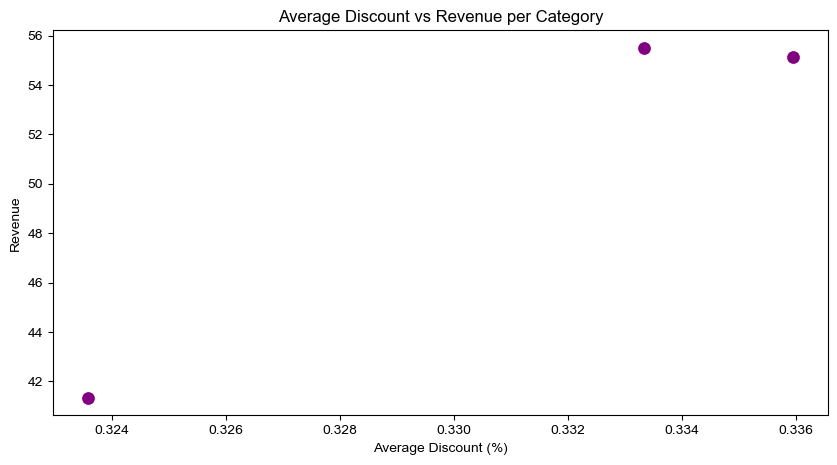

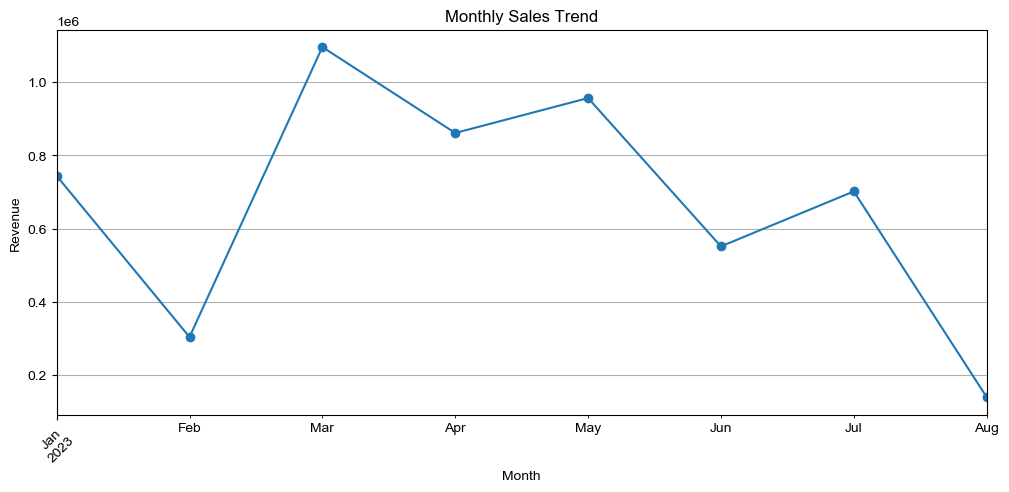

In [36]:
# =========================
# Clean & Dashboard-Ready EDA
# =========================

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#warnings.filterwarnings("ignore")
#%matplotlib inline

plt.rcParams['font.family'] = 'Arial Unicode MS'  # Works on Windows / macOS
plt.rcParams['axes.unicode_minus'] = False
# -------------------------
# Preprocessing
# -------------------------
def clean_columns(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    return df

customers = clean_columns(customers)
transactions = clean_columns(transactions)
products = clean_columns(products)
stores = clean_columns(stores)
employees = clean_columns(employees)
discounts = clean_columns(discounts)

# Clean customers
if 'date_of_birth' in customers.columns:
    customers['date_of_birth'] = pd.to_datetime(customers['date_of_birth'], errors='coerce')
    customers['age'] = (pd.Timestamp.today() - customers['date_of_birth']).dt.days // 365
    customers['age'] = customers['age'].fillna(customers['age'].median())

customers['name'] = customers['name'].str.strip().str.title()
customers['email'] = customers['email'].str.strip().str.lower()
customers['gender'] = customers['gender'].str.upper()
customers['job_title'] = customers.get('job_title', pd.Series(['Unknown']*len(customers)))

# Clean products
products['description_en'] = products['description_en'].str.strip().str.title()
products['category'] = products['category'].str.strip().str.title()
products['sub_category'] = products['sub_category'].str.strip().str.title()
products['production_cost'] = products['production_cost'].fillna(products['production_cost'].median())
products['color'] = products['color'].str.upper()

# Clean transactions
transactions['sales_amount'] = pd.to_numeric(transactions.get('sales_amount', transactions['unit_price']*transactions['quantity']), errors='coerce')
transactions['unit_price'] = pd.to_numeric(transactions['unit_price'], errors='coerce')
transactions['quantity'] = pd.to_numeric(transactions['quantity'], errors='coerce')
transactions['sales_amount'] = transactions['unit_price'] * transactions['quantity']
transactions['date'] = pd.to_datetime(transactions['date'], errors='coerce')

# Clean stores
stores['country'] = stores['country'].str.strip().str.title()
stores['city'] = stores['city'].str.strip().str.title()
stores['store_name'] = stores['store_name'].str.strip().str.title()

# -------------------------
# Merge Data for Insights
# -------------------------
trans_products = transactions.merge(products[['product_id','description_en','category','sub_category']], on='product_id', how='left')
customers_sales = transactions.groupby('customer_id')['sales_amount'].sum().reset_index()
customers_combined = customers.merge(customers_sales, on='customer_id', how='left').fillna(0)
store_sales = transactions.groupby('store_id')['sales_amount'].sum().reset_index()
stores_combined = stores.merge(store_sales, on='store_id', how='left').fillna(0)

# -------------------------
# PRODUCTS & SALES
# -------------------------
# Top 10 products by units sold
top_products_units = trans_products.groupby('description_en')['quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,5))
top_products_units.plot(kind='bar', color='skyblue')
plt.title("Top 10 Products by Units Sold")
plt.ylabel("Units Sold")
plt.xlabel("Product Description")
plt.xticks(rotation=45, ha='right')
plt.show()

# Top 10 products by revenue
top_products_revenue = trans_products.groupby('description_en')['sales_amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,5))
top_products_revenue.plot(kind='bar', color='lightgreen')
plt.title("Top 10 Products by Revenue")
plt.ylabel("Revenue")
plt.xlabel("Product Description")
plt.xticks(rotation=45, ha='right')
plt.show()

# Number of products per category
plt.figure(figsize=(10,5))
products['category'].value_counts().plot(kind='bar', color='orange')
plt.title("Number of Products per Category")
plt.ylabel("Count")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()

# Top categories by sales
category_sales = trans_products.groupby('category')['sales_amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
category_sales.plot(kind='bar', color='purple')
plt.title("Top Categories by Revenue")
plt.ylabel("Revenue")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()

# -------------------------
# CUSTOMERS
# -------------------------
# Age distribution
plt.figure(figsize=(10,5))
sns.histplot(customers_combined['age'], bins=20, kde=True, color='skyblue')
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

# Age vs total spending
plt.figure(figsize=(10,5))
sns.scatterplot(data=customers_combined, x='age', y='sales_amount')
plt.title("Customer Age vs Total Spending")
plt.xlabel("Age")
plt.ylabel("Total Spending")
plt.show()

# -------------------------
# STORES & EMPLOYEES
# -------------------------
# Number of stores per country
plt.figure(figsize=(10,5))
stores['country'].value_counts().plot(kind='bar', color='lightgreen')
plt.title("Number of Stores per Country")
plt.xlabel("Country")
plt.ylabel("Number of Stores")
plt.xticks(rotation=45)
plt.show()

# Number of employees per store
plt.figure(figsize=(12,5))
employees.groupby('store_id')['employee_id'].count().plot(kind='bar', color='orange')
plt.title("Number of Employees per Store")
plt.xlabel("Store ID")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.show()

# Average number of employees per country
avg_employees_country = stores.groupby('country')['number_of_employees'].mean()
plt.figure(figsize=(10,5))
avg_employees_country.plot(kind='bar', color='purple')
plt.title("Average Number of Employees per Country")
plt.ylabel("Average Employees")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()

# Top stores by sales
plt.figure(figsize=(12,5))
stores_combined.sort_values('sales_amount', ascending=False).head(10).plot(
    kind='bar', x='store_name', y='sales_amount', color='skyblue', legend=False)
plt.title("Top 10 Stores by Sales")
plt.ylabel("Revenue")
plt.xlabel("Store Name")
plt.xticks(rotation=45)
plt.show()

# -------------------------
# TRANSACTIONS
# -------------------------
# Sales by transaction type
plt.figure(figsize=(8,5))
transactions.groupby('transaction_type')['sales_amount'].sum().plot(kind='bar', color='lightgreen')
plt.title("Sales by Transaction Type")
plt.ylabel("Revenue")
plt.xlabel("Transaction Type")
plt.xticks(rotation=45)
plt.show()

# Discount effectiveness per category
discount_sales = trans_products.merge(discounts[['category','discont']], on='category', how='left')
discount_category = discount_sales.groupby('category')[['discont','sales_amount']].mean()
plt.figure(figsize=(10,5))
sns.scatterplot(data=discount_category, x='discont', y='sales_amount', s=100, color='purple')
plt.title("Average Discount vs Revenue per Category")
plt.xlabel("Average Discount (%)")
plt.ylabel("Revenue")
plt.show()

# -------------------------
# OPTIONAL: Seasonal / Monthly Trends
# -------------------------
monthly_sales = transactions.groupby(transactions['date'].dt.to_period('M'))['sales_amount'].sum()
plt.figure(figsize=(12,5))
monthly_sales.plot(marker='o', linestyle='-')
plt.title("Monthly Sales Trend")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [37]:
#future insights
import pandas as pd

# Ensure date column is datetime
transactions['date'] = pd.to_datetime(transactions['date'], errors='coerce')

# Monthly sales
monthly_sales = transactions.groupby(transactions['date'].dt.to_period('M'))['sales_amount'].sum()
monthly_sales = monthly_sales.to_timestamp()  # convert period to timestamp
monthly_sales = monthly_sales.reset_index()
monthly_sales.columns = ['month', 'sales']


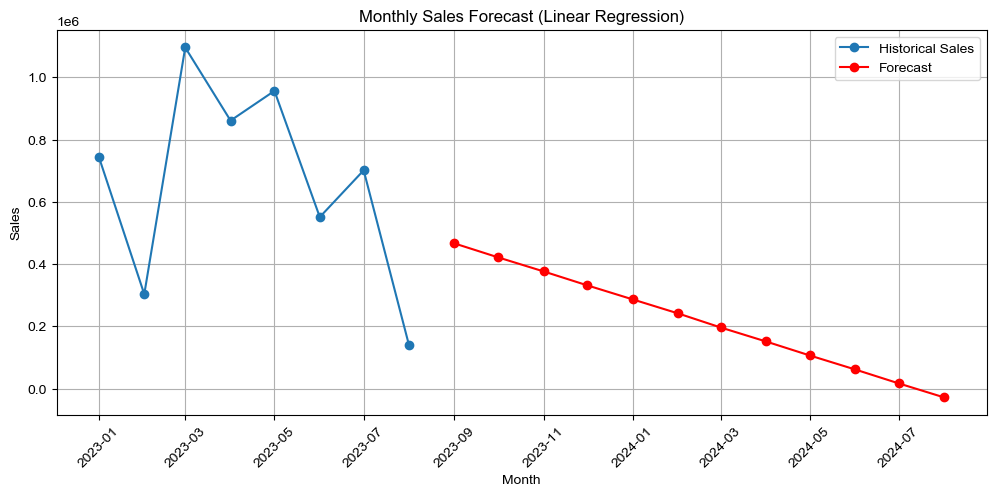

In [38]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Aggregate monthly sales
monthly_sales = transactions.groupby(transactions['date'].dt.to_period('M'))['sales_amount'].sum()
monthly_sales = monthly_sales.to_timestamp()  # convert PeriodIndex to Timestamp

# Convert to DataFrame
monthly_sales_df = monthly_sales.reset_index()
monthly_sales_df.columns = ['month', 'sales']  # rename columns

# Create month number for regression
monthly_sales_df['month_num'] = np.arange(len(monthly_sales_df))

# Prepare X and y
X = monthly_sales_df[['month_num']]
y = monthly_sales_df['sales']

# Fit Linear Regression
model = LinearRegression()
model.fit(X, y)

# Predict next 12 months
future_months = pd.DataFrame({'month_num': np.arange(len(monthly_sales_df), len(monthly_sales_df)+12)})
forecast = model.predict(future_months)

# Future dates
future_dates = pd.date_range(monthly_sales_df['month'].iloc[-1] + pd.offsets.MonthBegin(1), periods=12, freq='MS')

# Plot
plt.figure(figsize=(12,5))
plt.plot(monthly_sales_df['month'], monthly_sales_df['sales'], label='Historical Sales', marker='o')
plt.plot(future_dates, forecast, label='Forecast', marker='o', color='red')
plt.title("Monthly Sales Forecast (Linear Regression)")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

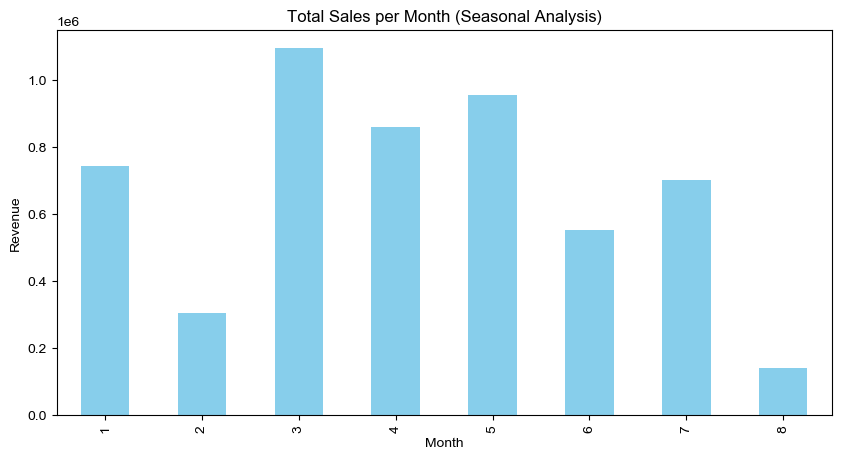

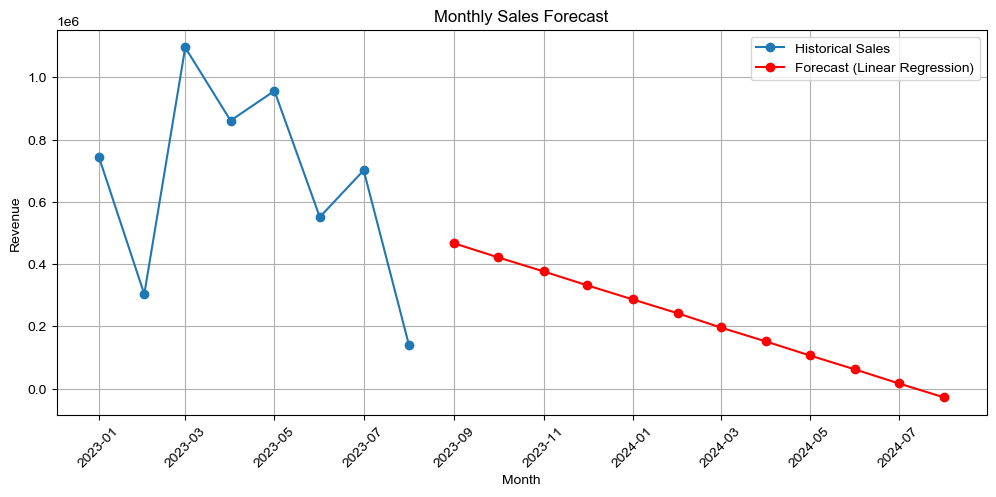

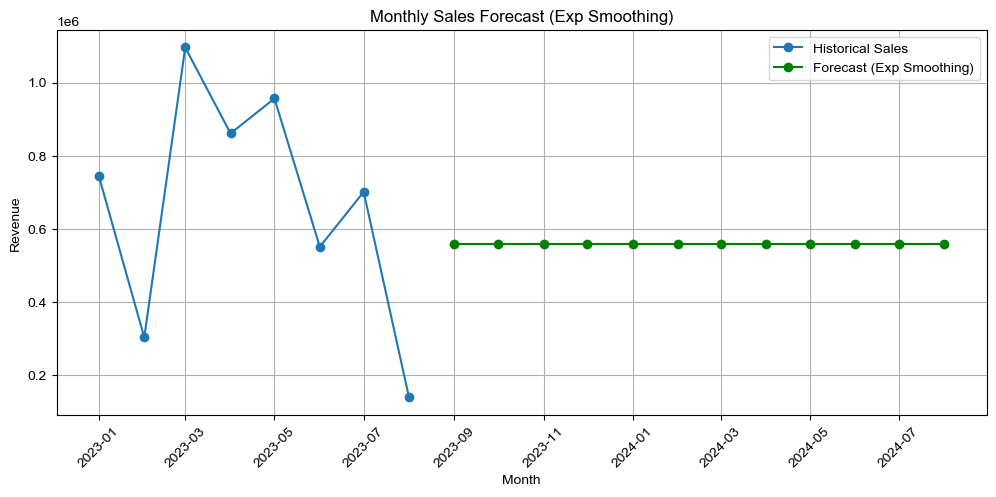

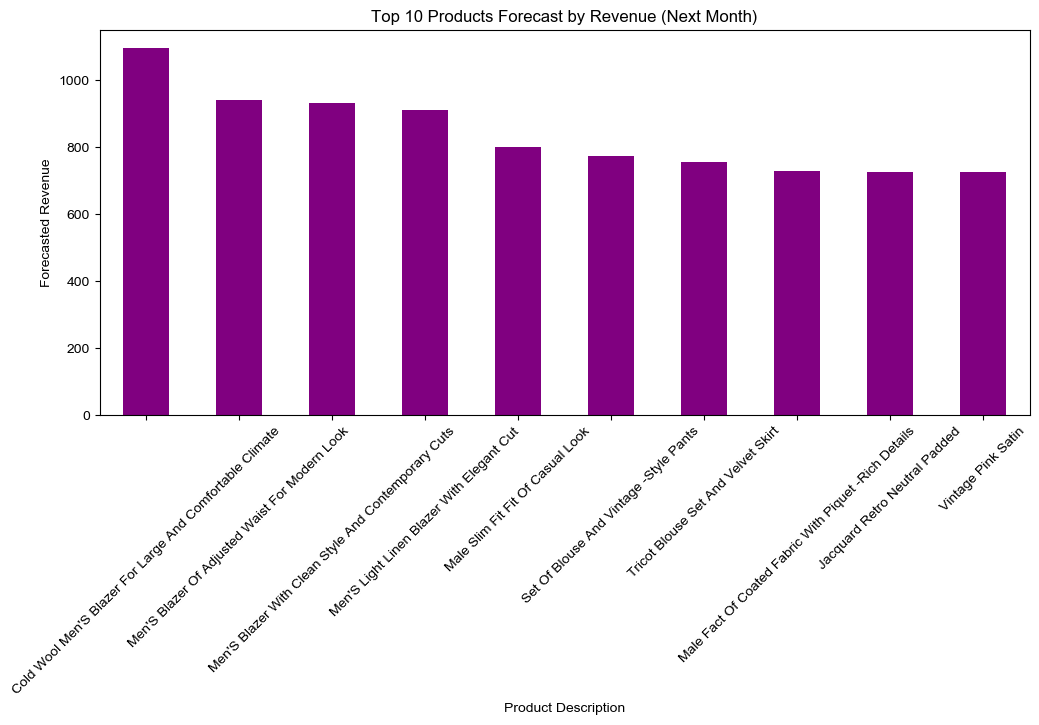

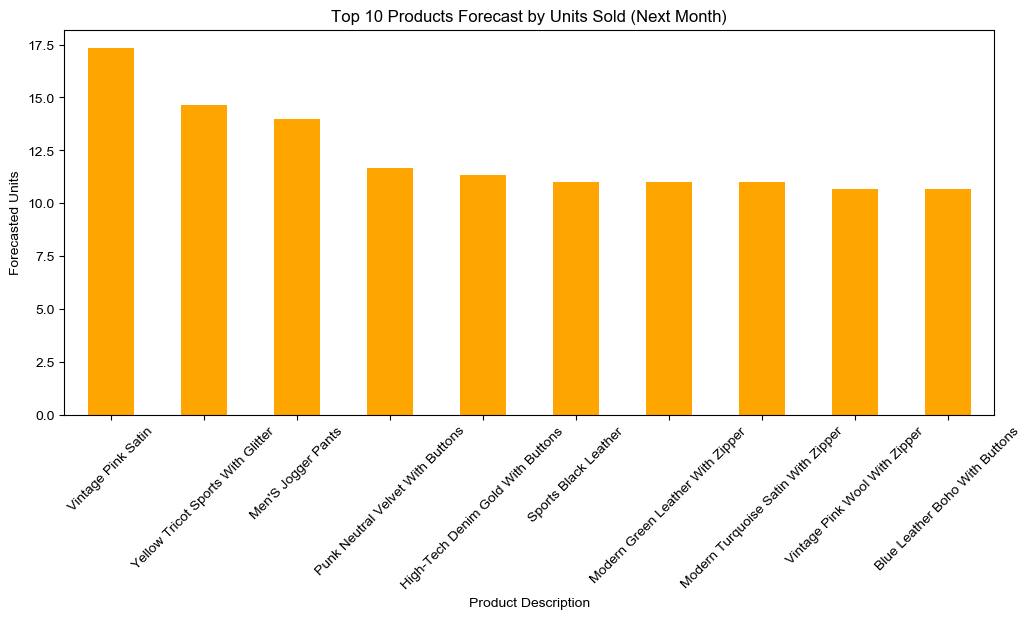

Top Products to Stock (Forecasted Next Month):
description_en
Vintage Pink Satin                                          11.0
Blue Leather Boho With Buttons                               NaN
Cold Wool Men'S Blazer For Large And Comfortable Climate     NaN
High-Tech Denim Gold With Buttons                            NaN
Jacquard Retro Neutral Padded                                NaN
Male Fact Of Coated Fabric With Piquet -Rich Details         NaN
Male Slim Fit Fit Of Casual Look                             NaN
Men'S Blazer Of Adjusted Waist For Modern Look               NaN
Men'S Blazer With Clean Style And Contemporary Cuts          NaN
Men'S Jogger Pants                                           NaN
dtype: float64
Top 10 High-Growth Stores (Revenue Growth):
store_id
1   -411555.0
Name: 2023-08, dtype: float64
Top 10 High-Growth Countries (Revenue Growth):
country
United States   -411555.0
Name: 2023-08, dtype: float64
Top 10 High-Value Customers Likely to Spend More:
       customer

In [39]:
# -------------------------
# FUTURE INSIGHTS - FASHION PROJECT
# -------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Arial Unicode MS'

# Ensure date column is datetime
transactions['date'] = pd.to_datetime(transactions['date'], errors='coerce')

# -------------------------
# 1️⃣ Seasonal / Peak Months Analysis
# -------------------------
monthly_sales = transactions.groupby(transactions['date'].dt.month)['sales_amount'].sum()
plt.figure(figsize=(10,5))
monthly_sales.plot(kind='bar', color='skyblue', title='Total Sales per Month (Seasonal Analysis)')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

# -------------------------
# 2️⃣ Monthly Sales Forecast (Linear Regression & Exponential Smoothing)
# -------------------------
# Aggregate monthly sales
monthly_sales_lr = transactions.groupby(transactions['date'].dt.to_period('M'))['sales_amount'].sum().to_timestamp()
monthly_sales_df = monthly_sales_lr.reset_index()
monthly_sales_df.columns = ['month', 'sales']
monthly_sales_df['month_num'] = np.arange(len(monthly_sales_df))

# Linear Regression
X = monthly_sales_df[['month_num']]
y = monthly_sales_df['sales']
lr_model = LinearRegression()
lr_model.fit(X, y)

# Forecast next 12 months
future_months = pd.DataFrame({'month_num': np.arange(len(monthly_sales_df), len(monthly_sales_df)+12)})
lr_forecast = lr_model.predict(future_months)
future_dates = pd.date_range(monthly_sales_df['month'].iloc[-1]+pd.offsets.MonthBegin(1), periods=12, freq='MS')

plt.figure(figsize=(12,5))
plt.plot(monthly_sales_df['month'], y, marker='o', label='Historical Sales')
plt.plot(future_dates, lr_forecast, marker='o', color='red', label='Forecast (Linear Regression)')
plt.title("Monthly Sales Forecast")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

# Exponential Smoothing
exp_model = SimpleExpSmoothing(monthly_sales_df['sales']).fit(smoothing_level=0.3, optimized=False)
exp_forecast = exp_model.forecast(12)

plt.figure(figsize=(12,5))
plt.plot(monthly_sales_df['month'], y, marker='o', label='Historical Sales')
plt.plot(future_dates, exp_forecast, marker='o', color='green', label='Forecast (Exp Smoothing)')
plt.title("Monthly Sales Forecast (Exp Smoothing)")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

# -------------------------
# 3️⃣ Top Products Forecast (Units & Revenue)
# -------------------------
# Merge transactions with product descriptions
trans_prod_desc = transactions.merge(products[['product_id','description_en']], on='product_id', how='left')

# Aggregate monthly sales per product
product_sales = trans_prod_desc.groupby(['description_en', trans_prod_desc['date'].dt.to_period('M')])['sales_amount'].sum().unstack(fill_value=0)
product_units = trans_prod_desc.groupby(['description_en', trans_prod_desc['date'].dt.to_period('M')])['quantity'].sum().unstack(fill_value=0)

# Forecast next month using last 3-month average
top_products_revenue_forecast = product_sales.iloc[:, -3:].mean(axis=1).sort_values(ascending=False).head(10)
top_products_units_forecast = product_units.iloc[:, -3:].mean(axis=1).sort_values(ascending=False).head(10)

plt.figure(figsize=(12,5))
top_products_revenue_forecast.plot(kind='bar', color='purple')
plt.title("Top 10 Products Forecast by Revenue (Next Month)")
plt.ylabel("Forecasted Revenue")
plt.xlabel("Product Description")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,5))
top_products_units_forecast.plot(kind='bar', color='orange')
plt.title("Top 10 Products Forecast by Units Sold (Next Month)")
plt.ylabel("Forecasted Units")
plt.xlabel("Product Description")
plt.xticks(rotation=45)
plt.show()


# -------------------------
# 4️⃣ Top Products to Stock
# -------------------------
# Combine revenue + units to rank products
top_products_to_stock = (top_products_revenue_forecast.rank(ascending=False) + top_products_units_forecast.rank(ascending=False)).sort_values().head(10)
print("Top Products to Stock (Forecasted Next Month):")
print(top_products_to_stock)

# -------------------------
# 5️⃣ High-Growth Stores / Countries
# -------------------------
store_sales = transactions.groupby(['store_id', transactions['date'].dt.to_period('M')])['sales_amount'].sum().unstack(fill_value=0)
store_growth = (store_sales.iloc[:, -1] - store_sales.iloc[:, -3].mean()).sort_values(ascending=False).head(10)
print("Top 10 High-Growth Stores (Revenue Growth):")
print(store_growth)

country_sales = transactions.merge(stores[['store_id','country']], on='store_id', how='left')
country_sales = country_sales.groupby(['country', country_sales['date'].dt.to_period('M')])['sales_amount'].sum().unstack(fill_value=0)
country_growth = (country_sales.iloc[:, -1] - country_sales.iloc[:, -3].mean()).sort_values(ascending=False).head(10)
print("Top 10 High-Growth Countries (Revenue Growth):")
print(country_growth)

# -------------------------
# 6️⃣ High-Value Customer Trend
# -------------------------
customer_sales = transactions.groupby(['customer_id', transactions['date'].dt.to_period('M')])['sales_amount'].sum().unstack(fill_value=0)
# Calculate trend: last month vs average of previous 3 months
customer_trend = (customer_sales.iloc[:, -1] - customer_sales.iloc[:, -4:-1].mean(axis=1)).sort_values(ascending=False).head(10)
top_customers = customers[customers['customer_id'].isin(customer_trend.index)][['customer_id','name','email']]
top_customers['predicted_trend'] = customer_trend.values
print("Top 10 High-Value Customers Likely to Spend More:")
print(top_customers)


In [1]:
import os
import pandas as pd

# Define input/output paths
input_path = r"C:\Users\user\Jupyter Notebook\fashion project\data\raw\\"
output_path = r"C:\Users\user\Jupyter Notebook\fashion project\data\cleaned\\"

# Ensure cleaned folder exists
os.makedirs(output_path, exist_ok=True)

# List of files to clean
tables = ["customers", "discounts", "employees", "products", "stores", "transactions"]

# Function to clean a dataframe (future-proof, warning-free)
def clean_data(df):
    # Remove duplicates
    df = df.drop_duplicates()

    # Fill missing values
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    for col in numeric_cols:
        df[col] = df[col].fillna(df[col].mean())

    for col in categorical_cols:
        df[col] = df[col].fillna(df[col].mode()[0])

    # Strip extra spaces from text columns
    df[categorical_cols] = df[categorical_cols].apply(lambda x: x.str.strip())

    # Convert date columns properly
    for col in df.columns:
        if 'date' in col.lower():
            df[col] = pd.to_datetime(df[col], errors='coerce')

    return df

# Loop through each table, clean it, and save to cleaned folder
for name in tables:
    print(f"🔹 Cleaning {name}.csv ...")
    df = pd.read_csv(input_path + f"{name}.csv", nrows=100000, low_memory=False).copy()  # copy() avoids warnings
    df = clean_data(df)
    df.to_csv(output_path + f"{name}_cleaned.csv", index=False)
    print(f"✅ Saved cleaned file: {name}_cleaned.csv")

print("🎉 All files cleaned and saved successfully in the 'data/cleaned' folder!")


🔹 Cleaning customers.csv ...
✅ Saved cleaned file: customers_cleaned.csv
🔹 Cleaning discounts.csv ...
✅ Saved cleaned file: discounts_cleaned.csv
🔹 Cleaning employees.csv ...
✅ Saved cleaned file: employees_cleaned.csv
🔹 Cleaning products.csv ...
✅ Saved cleaned file: products_cleaned.csv
🔹 Cleaning stores.csv ...
✅ Saved cleaned file: stores_cleaned.csv
🔹 Cleaning transactions.csv ...


C:\Users\user\AppData\Local\Temp\ipykernel_16088\34743860.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].mean())
C:\Users\user\AppData\Local\Temp\ipykernel_16088\34743860.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].mode()[0])
C:\Users\user\AppData\Local\Temp\ipykernel_16088\34743860.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

✅ Saved cleaned file: transactions_cleaned.csv
🎉 All files cleaned and saved successfully in the 'data/cleaned' folder!
